In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

#1 cleaning 

In [404]:
commerce_data_df = pd.read_csv('marketing_campaign.csv', sep = "\t")
commerce_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [405]:
commerce_data_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [406]:
size_map = {'Basic' : 1, 'Graduation': 2, 'Master' : 3, '2n Cycle': 4, 'PhD': 5}
commerce_data_df['Education'] = commerce_data_df['Education'].map(size_map)

In [407]:
size_map = {'Single' : 1, 'Married': 2, 'Divorced' : 3, 'Widow': 4, 'Together': 5, 'YOLO': 6}
commerce_data_df['Marital_Status'] = commerce_data_df['Marital_Status'].map(size_map)

In [408]:
commerce_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,1.0,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,1.0,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5.0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5.0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,5,2.0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,2.0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,5,5.0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,3.0,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5.0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [409]:
commerce_data_df = commerce_data_df.fillna(0)

In [410]:
commerce_data_df = commerce_data_df.drop(['Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue',] , axis =1)

In [411]:
commerce_data_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,1.0,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,1.0,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5.0,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5.0,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,5,2.0,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,2.0,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,5,5.0,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,2,3.0,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,3,5.0,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


In [412]:
commerce_data_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,1.0,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,1.0,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5.0,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5.0,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,5,2.0,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,2.0,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,5,5.0,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,2,3.0,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,3,5.0,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


I dropped the date and ID as I felt they weren't needed for the data, I also dropped the Z cost and the Z rev as they always had 3s and 11s for their respective column. I mapped the marital status and the education as Onehot would make it have way more columns than it needed to. Along with this I filled in the NA values for the entire datasheet. Other than that there wasn't much to clean other than making sure all the values were numerical

#2 Clustering

Text(0.5, 1.0, 'Elbow Method with Distortion')

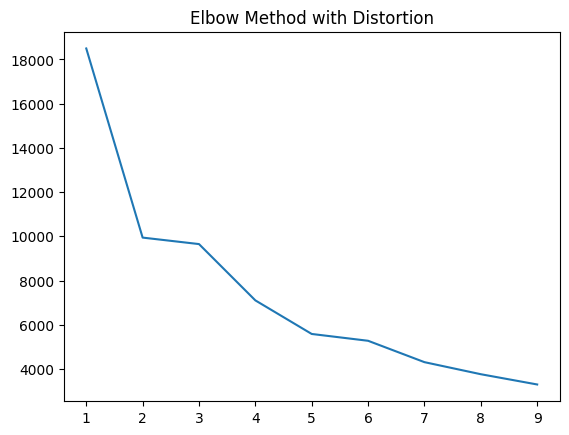

In [413]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
X = commerce_data_df.drop('Response', axis=1)
y = commerce_data_df['Response']

inertias = []
distortions = []

for k in range(1,10):
    model = KMeans(n_clusters=k).fit(X)
        
    distance = cdist(X, model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)
        
    inertia = model.inertia_
    inertias.append(inertia)
        
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Distortion')

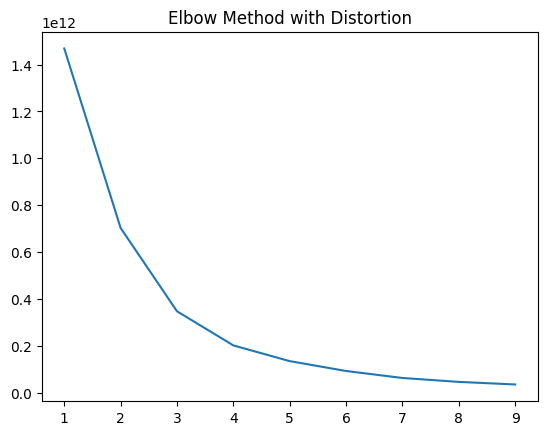

In [414]:

plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Distortion')

For K means I used the whole set of data rather than just a part of it as I felt like all the values were important for it rather than just subsections of these data. Looking at the two curves it looks like the idea number of clusters lies around 3.

#3

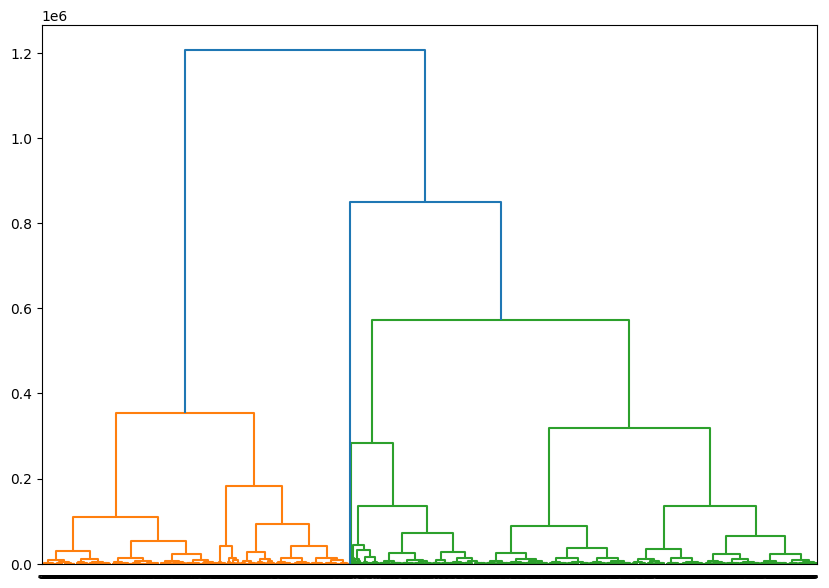

In [415]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

For this it looks like again the ideal number of clusters rests around 3. You can tell this because of where the lines start to split off into more subsections on the graph.

#4

I feel that the both results were postive in being able to identify the right amount of clusters for the model. In my opnion, I feel that the elbow methods are better seeing as you can compare the two differnt types of elbow methods between each other and I feel like you get more of a distinct answer from the graph, while the hierarchical chart is a little bit harder to read and could be more subjective at the cutoff of clusters.